# Agenda
- MultiClass Classification
  - Example with Online Gaming Behavior Dataset
  - Naive Bayes
  - K Nearest Neighbor
  - Decision Tree
  - Random Forest
- Multi Label Classification
  - Examples

## MultiClass Classification

Multiclass classification is a type of classification task that involves classifying instances into one of the tree or more classes.

In [1]:
# Let us apply the algorithm on online gaming behavior dataset(multiclass)

The **Online Gaming Behavior** dataset on Kaggle is designed to analyze and predict players' behaviors in online gaming. It includes data on various aspects such as player identification, session duration, in-game actions, and purchases. The dataset comprises several features that capture player activities and interactions within the game environment, providing a rich source of information for developing predictive models. This data can be leveraged to understand player engagement, forecast future behavior, and tailor strategies to enhance user experience and retention.

**Number of Instances:** 40034

**Number of Attributes:** 13

**Attribute Information:**

- **PlayerID:** Unique identifier for each player.
- **Age:** Age of the player.
- **Gender:** Gender of the player.
- **Location:** Geographic location of the player.
- **GameGenre:** Genre of the game the player is engaged in.
- **PlayTimeHours:** Average hours spent playing per session.
- **InGamePurchases:** Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
- **GameDifficulty:** Difficulty level of the game.
- **SessionsPerWeek:** Number of gaming sessions per week.
- **AvgSessionDurationMinutes:** Average duration of each gaming session in minutes.
- **PlayerLevel:** Current level of the player in the game.
- **AchievementsUnlocked:** Number of achievements unlocked by the player

**Target Variable**
- **EngagementLevel:** Categorized engagement level reflecting player retention (Medium, High, and Low).

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import ConfusionMatrixDisplay
from itertools import cycle

In [3]:
# Read The DataSet

df =  pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
# Check for missing values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [6]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [7]:
# Drop the PlayerID Column

df = df.drop(columns = ['PlayerID'])

In [8]:
# Distribution of Target Variable
df.EngagementLevel.value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

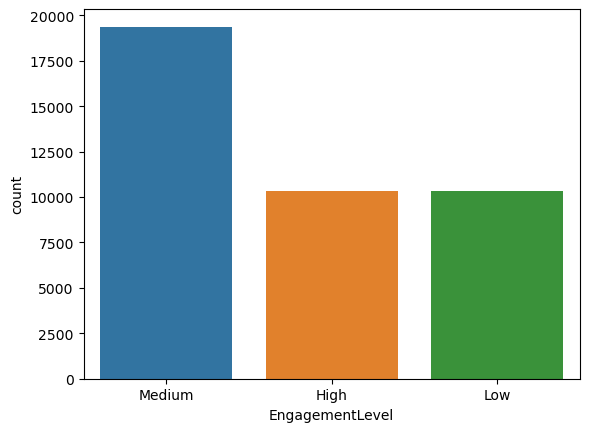

In [9]:
sns.countplot(x = 'EngagementLevel', data = df, hue = 'EngagementLevel')
plt.show()

In [10]:
# Segregate Features and Target
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [11]:
df.describe(include= 'object')

,Gender,Location,GameGenre,GameDifficulty,EngagementLevel
count,40034,40034,40034,40034,40034
unique,2,4,5,3,3
top,Male,USA,Sports,Easy,Medium
freq,23959,16000,8048,20015,19374


In [12]:
# Applying one hot encoding would increase the dimensionality and would potentially cause multicollinearity.
#Hence Applying labelEncoding 

In [13]:
cat_col =  X.select_dtypes('object').columns
for col in cat_col:
    le =  LabelEncoder()
    X[col] =  le.fit_transform(X[col])

In [14]:
X.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,1,2,4,16.271119,0,2,6,108,79,25
1,29,0,3,4,5.525961,0,2,5,144,11,10
2,22,0,3,3,8.223755,0,0,16,142,35,41
3,35,1,3,0,5.265351,1,0,9,85,57,47
4,33,1,1,0,15.531945,0,2,2,131,95,37


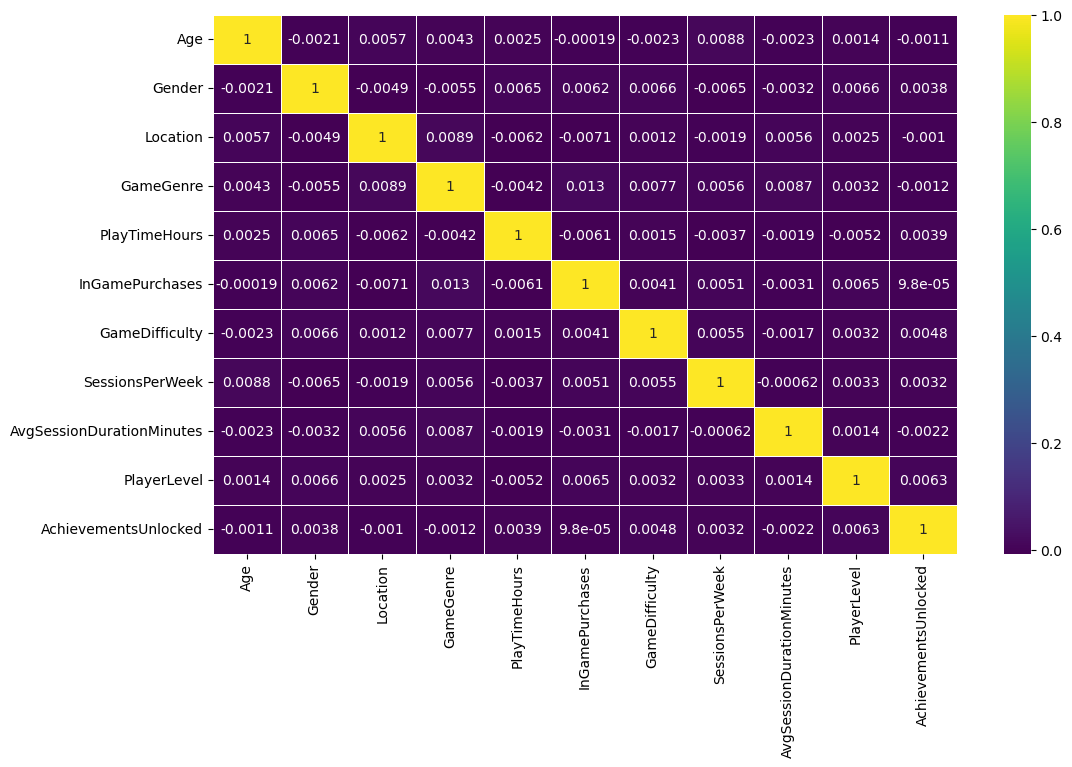

In [15]:
# Heatmap for Features

plt.figure(figsize = (12,7))
corr_mat=  X.corr()
sns.heatmap(corr_mat, annot = True, cmap = 'viridis', linewidths = 0.5)
plt.show()

In [16]:
# Train test Split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size =0.3, random_state =25)

In [17]:
#Apply Standard Scaling 
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
models = [GaussianNB(), KNeighborsClassifier(n_neighbors =5),DecisionTreeClassifier(max_depth =3), RandomForestClassifier() ]

In [24]:
def model_function(model, X_train_sc, X_test_sc, y_train, y_test):
    print(f'Results for {model}')
    print('---------------------------------------')
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    y_pred_prob = model.predict_proba(X_test_sc)
    # Determine the class order
    class_order =  model.classes_
    print(f'Class Order {class_order}')
    results_df = pd.DataFrame({
        'Actual Label': y_test,
        'Predicted Label':y_pred
    })
    for i, class_name in enumerate(class_order):
        results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob[:, i], 2)
    training_accuracy = accuracy_score(y_train, model.predict(X_train_sc))
    testing_accuracy = accuracy_score(y_test, y_pred)
    print(f'Training Accuracy {training_accuracy:.3f}')
    print(f'Testing Accuracy {testing_accuracy:.3f}')
    conf_mat =  confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = class_order)
    cm_display.plot(colorbar =False)
    plt.show()
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    # plot roc curve
    if len(set(y_test))>1:
        y_test_binarize = label_binarize(y_test, classes = class_order)
        n_classes =  y_test_binarize.shape[1]
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ =  roc_curve(y_test_binarize[:,i], y_pred_prob[:,i])
            roc_auc[i] = roc_auc_score(y_test_binarize[:,i], y_pred_prob[:,i])
        plt.figure()
        colors =  cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color = color, lw =2, label = f'ROC Curve for class{i} (Area = {roc_auc[i]:.3f})')
        plt.plot([0,1], [0,1], 'k--', lw =2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model}')
        plt.legend()
        plt.show()
    else:
        print('ROC AUC Score is not defined as only one class is present')
        

        
    

Results for GaussianNB()
---------------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.841
Testing Accuracy 0.842


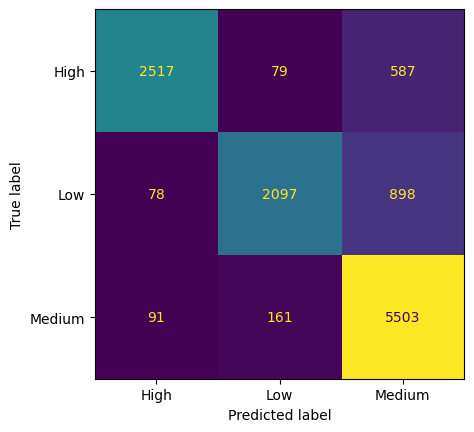

              precision    recall  f1-score   support

        High       0.94      0.79      0.86      3183
         Low       0.90      0.68      0.78      3073
      Medium       0.79      0.96      0.86      5755

    accuracy                           0.84     12011
   macro avg       0.87      0.81      0.83     12011
weighted avg       0.86      0.84      0.84     12011



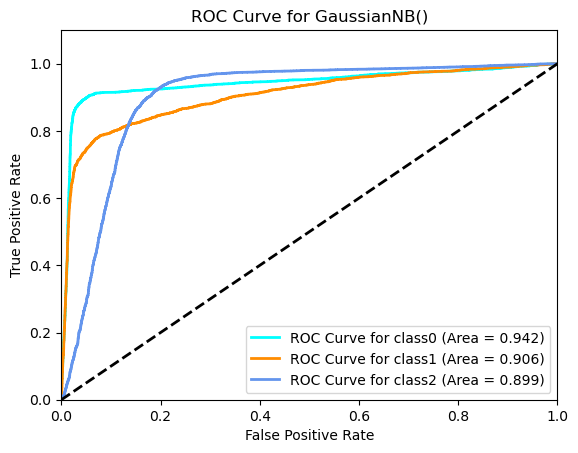

Results for KNeighborsClassifier()
---------------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.844
Testing Accuracy 0.759


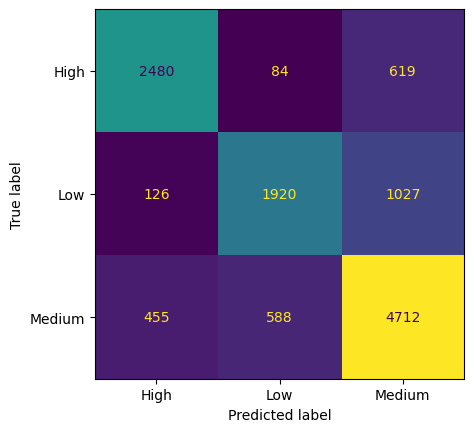

              precision    recall  f1-score   support

        High       0.81      0.78      0.79      3183
         Low       0.74      0.62      0.68      3073
      Medium       0.74      0.82      0.78      5755

    accuracy                           0.76     12011
   macro avg       0.76      0.74      0.75     12011
weighted avg       0.76      0.76      0.76     12011



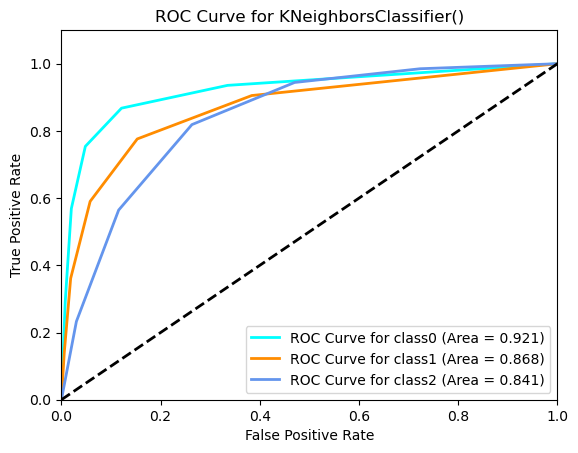

Results for DecisionTreeClassifier(max_depth=3)
---------------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 0.801
Testing Accuracy 0.802


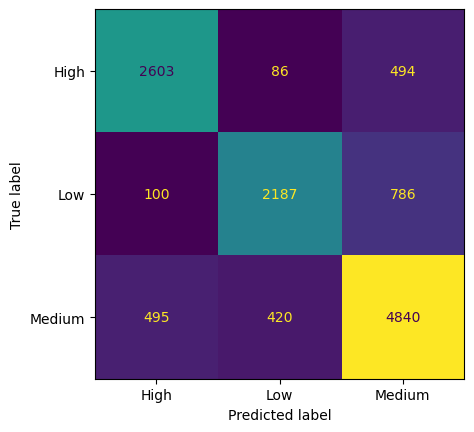

              precision    recall  f1-score   support

        High       0.81      0.82      0.82      3183
         Low       0.81      0.71      0.76      3073
      Medium       0.79      0.84      0.82      5755

    accuracy                           0.80     12011
   macro avg       0.81      0.79      0.80     12011
weighted avg       0.80      0.80      0.80     12011



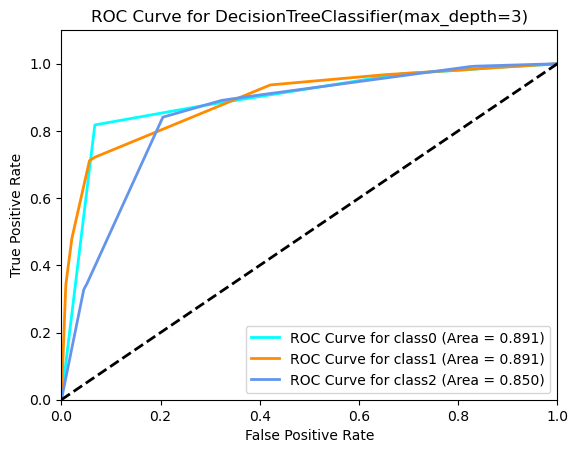

Results for RandomForestClassifier()
---------------------------------------
Class Order ['High' 'Low' 'Medium']
Training Accuracy 1.000
Testing Accuracy 0.913


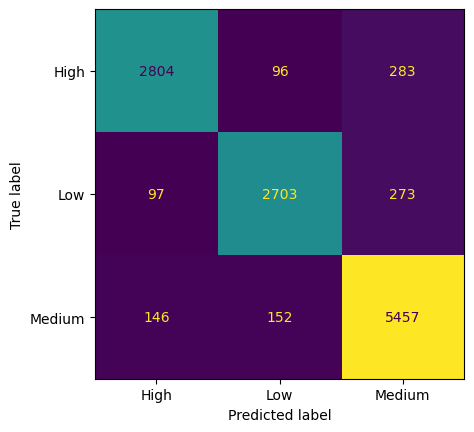

              precision    recall  f1-score   support

        High       0.92      0.88      0.90      3183
         Low       0.92      0.88      0.90      3073
      Medium       0.91      0.95      0.93      5755

    accuracy                           0.91     12011
   macro avg       0.91      0.90      0.91     12011
weighted avg       0.91      0.91      0.91     12011



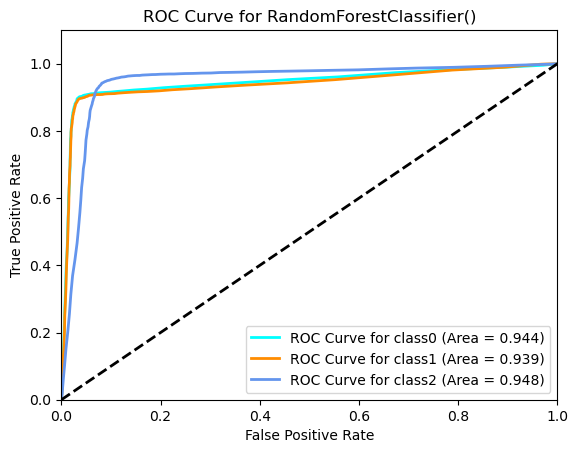

In [25]:
for model in models:
    model_function(model, X_train, X_test, y_train, y_test)
    

# Multi Label Classification

it allows us to classify datasets with more than 1 target variable. one input may belong to more than one categories. Examples
- Text Categorization
- Image Tagging
- Medical Diagnosis
- Music/Video Genre Classification